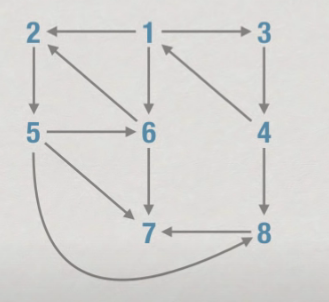

In [58]:
# Start node labelling from 1,2,3....n
adj_list = {}
adj_list[1] = [2,3,6]
adj_list[2] = [5]
adj_list[3] = [4]
adj_list[4] = [1,8]
adj_list[5] = [6,7,8]
adj_list[6] = [2,7]
adj_list[7]= []
adj_list[8] = [7]
for i,j in adj_list.items():
    print(f"{i} --> {j}")

1 --> [2, 3, 6]
2 --> [5]
3 --> [4]
4 --> [1, 8]
5 --> [6, 7, 8]
6 --> [2, 7]
7 --> []
8 --> [7]


In [59]:
visited = [0 for i in range(len(adj_list))]
parent = [-1 for i in range(len(adj_list))]
pre = [-1 for i in range(len(adj_list))]
post = [-1 for i in range(len(adj_list))]

In [60]:
count = 0
def DFS(i): # i-> start node
    global count
    visited[i-1] = 1
    pre[i-1] = count
    count+=1
    print(i)
    for j in adj_list[i]:
        if not visited[j-1]:
            parent[j-1] = i
            DFS(j)
    post[i-1] = count
    count+=1

In [61]:
DFS(1) # Prints the sequence of traversal

1
2
5
6
7
8
3
4


In [62]:
for i in range(len(adj_list)):
    print(f"Node: {i+1:2},   Parent: {parent[i]:2},   Pre: {pre[i]:2},   post: {post[i]:2}")
    print("-"*50)

Node:  1,   Parent: -1,   Pre:  0,   post: 15
--------------------------------------------------
Node:  2,   Parent:  1,   Pre:  1,   post: 10
--------------------------------------------------
Node:  3,   Parent:  1,   Pre: 11,   post: 14
--------------------------------------------------
Node:  4,   Parent:  3,   Pre: 12,   post: 13
--------------------------------------------------
Node:  5,   Parent:  2,   Pre:  2,   post:  9
--------------------------------------------------
Node:  6,   Parent:  5,   Pre:  3,   post:  6
--------------------------------------------------
Node:  7,   Parent:  6,   Pre:  4,   post:  5
--------------------------------------------------
Node:  8,   Parent:  5,   Pre:  7,   post:  8
--------------------------------------------------


Now, Classifying Graph edges into Tree Edges, Forward Edges, Back Edges and Cross Edges

In [63]:
tree_edges = []
for i in range(1,len(adj_list)+1):
    if parent[i-1] == -1: #root node
        continue
    else:
        tree_edges.append((parent[i-1], i))

In [64]:
tree_edges

[(1, 2), (1, 3), (3, 4), (2, 5), (5, 6), (6, 7), (5, 8)]

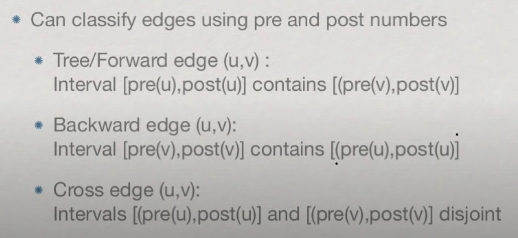

In [65]:
def edge_type(reference, t): # reference: (pre(u), post(u)) ,  t: (pre(v), post(v)) where u->v is an edge in graph
    if t[0]>reference[0] and t[1]<reference[1] :
        return 'forward'
    elif t[0]<reference[0] and t[1]>reference[1] :
        return 'back'
    else:
        return 'cross'

In [66]:
print(edge_type((0,6),(2,4)))
print(edge_type((5,7),(2,9)))
print(edge_type((5,7),(8,11)))

forward
back
cross


In [67]:
forward_edges = []
back_edges= []
cross_edges = []
for key,neighbours in adj_list.items():
    for node in neighbours:
        if ((key, node)) in tree_edges:
            continue
        elif (edge_type((pre[key-1],post[key-1]), (pre[node-1],post[node-1])) == 'forward'):
            forward_edges.append((key, node))
        elif (edge_type((pre[key-1],post[key-1]), (pre[node-1],post[node-1])) == 'back'):
            back_edges.append((key, node))
        elif (edge_type((pre[key-1],post[key-1]), (pre[node-1],post[node-1])) == 'cross'):
            cross_edges.append((key, node))

In [68]:
forward_edges

[(1, 6), (5, 7)]

In [69]:
back_edges

[(4, 1), (6, 2)]

In [70]:
cross_edges

[(4, 8), (8, 7)]